In [30]:
from google.colab import drive
import glob
import itertools
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras import layers, metrics

In [31]:
mount = '/content/gdrive'

drive.mount(mount)

drive_root = mount + '/My Drive/Data Mining Research Paper'

%cd $drive_root

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Data Mining Research Paper


In [32]:
no_of_samples = 5
images = []
labels = []
length = 128
width = 128
size = length, width

labels_map = {
    'a': 0,
    'b': 1,
    'c': 2,
    'd': 3,
    'f': 4,
    'g': 5,
}

In [33]:
for label in labels_map:
  
  temp = 0
  
  for path in glob.glob('Dataset/SL_Muhammad/' + label + '/*.jpg'):
    if temp < no_of_samples:
      img = cv2.imread(path)
      
      grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      inp = cv2.resize(grayscale, size)

      images.append(inp)
      labels.append(labels_map[label])
      temp = temp + 1
  
  print(label)

a
b
c
d
f
g


(-0.5, 127.5, 127.5, -0.5)

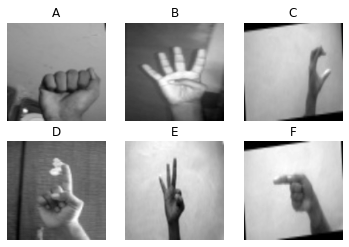

In [34]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.imshow(images[no_of_samples * 0 + 1], cmap='gray')
ax1.set(title='A')
ax1.axis('off')
ax2.imshow(images[no_of_samples * 1 + 1], cmap='gray')
ax2.set(title='B')
ax2.axis('off')
ax3.imshow(images[no_of_samples * 2 + 1], cmap='gray')
ax3.set(title='C')
ax3.axis('off')
ax4.imshow(images[no_of_samples * 3 + 1], cmap='gray')
ax4.set(title='D')
ax4.axis('off')
ax5.imshow(images[no_of_samples * 4 + 1], cmap='gray')
ax5.set(title='E')
ax5.axis('off')
ax6.imshow(images[no_of_samples * 5 + 1], cmap='gray')
ax6.set(title='F')
ax6.axis('off')

In [35]:
images = np.asarray(images, dtype=np.float32)
images = images/255.0
labels = np.asarray(labels)

In [36]:
images = images.reshape(images.shape + (1,))

binarizer = LabelBinarizer()
labels = binarizer.fit_transform(labels)

In [37]:
model = keras.models.load_model('models/modified_ADCNN_epochsval')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 32)        0

In [38]:
y_pred = model.predict(images)

In [39]:
print(np.argmax(labels, axis=1))

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5]


In [40]:
print(np.argmax(y_pred, axis=1))

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 4 4 3 3 4 4 4 4 4 5 5 5 5 5]
